# Intro Unsupervised Learning

![](https://media.giphy.com/media/kZJcpM3gYdlK4D64Ft/giphy.gif)

## ¿Cuándo usamos Unsupervised Learning?

**Ejemplos:** (Cuando no hay etiquetas)

+ Segmentación de clientes
+ Segmentación de productos
+ One-person segment (lo que funciona bien en un grupo no funciona necesariamente en otro)
+ Agrupación según características

**Escenario**

Cada elemento (usuario, cliente, producto..) puede ser considerado un vector. Dado un paquete de vectores se distribuyen por clusters. Vectores similares estarán en el mismo cluster, y clusters similares estarán más 'cerca' entre si que los que son más diferentes.

Todo éste proceder asume la existencia de una métrica de distancia, así se puede medir dicha distancia entre vectores dentro del espacio vectorial.

**Pasos para aplicar USL:**

+ **1**: Representación vectorial
+ **2**: Métrica, función de distancia
+ **3**: Medida de similitud

Cuando se crea un cluster, el vector en el centro del cluster (centroide) se considera el prototipo o el más representativo del cluster.


**Problemas tratables por USL:**

+ Segmentación de mercado
+ Detección de fraude en seguros o banca
+ Respuesta a tratamientos médicos
+ Detección de outliers

**Ejemplos de modelos:**

+ K-Means
+ Hierarchical Clustering
+ DBSCAN
+ HDBSCAN
+ GMM

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# El mantra
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")

## PCA
**Principal Component Analysis**
Principal Component Analysis (PCA) es un método estadístico que permite simplificar la complejidad de espacios muestrales con muchas dimensiones a la vez que conserva su información. Supóngase que existe una muestra con n individuos cada uno con p variables (X1, X2, …, Xp), es decir, el espacio muestral tiene p dimensiones. PCA permite encontrar un número de factores subyacentes (z<p) que explican aproximadamente lo mismo que las p variables originales. Donde antes se necesitaban p valores para caracterizar a cada individuo, ahora bastan z valores. Cada una de estas z nuevas variables recibe el nombre de componente principal.

Principal Component Analysis pertenece a la familia de técnicas conocida como unsupervised learning. Los métodos de supervised learning descritos en capítulos anteriores tienen el objetivo de predecir una variable respuesta Y a partir de una serie de predictores. Para ello, se dispone de p características (X1, X2 … Xp) y de la variable respuesta Y medidas en n observaciones. En el caso de unsupervised learning, la variable respuesta Y no se tiene en cuenta ya que el objetivo no es predecir Y sino extraer información empleando los predictores, por ejemplo, para identificar subgrupos. El principal problema al que se enfrentan los métodos de unsupervised learning es la dificultad para validar los resultados dado que no se dispone de una variable respuesta que permita contrastarlos.

El método de PCA permite por lo tanto “condensar” la información aportada por múltiples variables en solo unas pocas componentes. Esto lo convierte en un método muy útil de aplicar previa utilización de otras técnicas estadísticas tales como regresión, clustering… Aun así no hay que olvidar que sigue siendo necesario disponer del valor de las variables originales para calcular las componentes.

[¿Qué es PCA?](https://empresas.blogthinkbig.com/python-para-todos-que-es-el-pca/)

In [3]:
iris = sns.load_dataset("iris")

In [4]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [11]:
iris.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

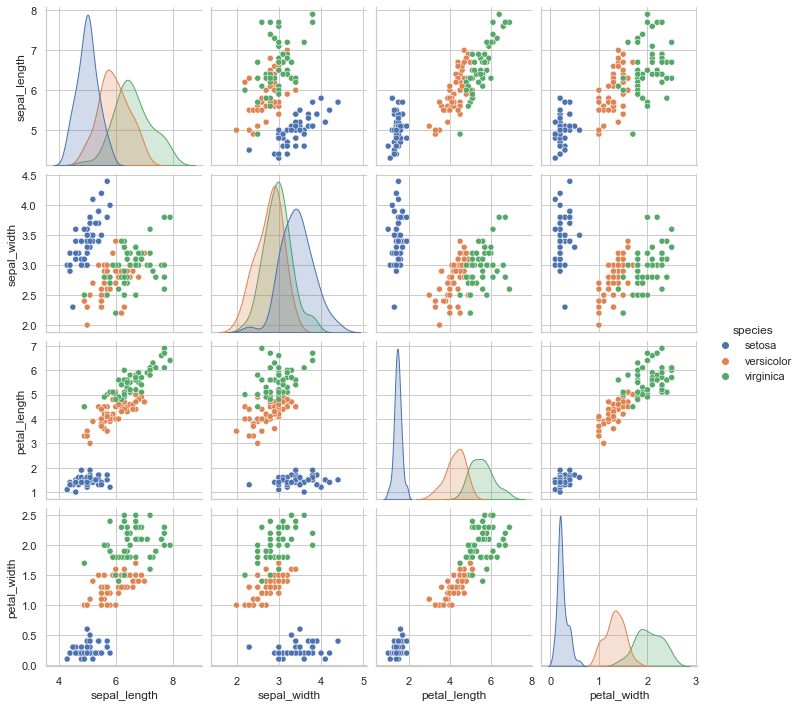

In [6]:
# PCA using Sklearn
sns.pairplot(iris, hue="species")

In [7]:
from sklearn.decomposition import PCA

El resultado después de hacer fit_transform es que donde teníamos 4 características ahora tenemos 2

In [16]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [96]:
pca = PCA(2)
iris_t = pd.DataFrame(pca.fit_transform(iris.drop(columns="species")), columns=["PC1", "PC2"] )

In [97]:
iris_t.head()

,PC1,PC2
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949
3,-2.745343,-0.318299
4,-2.728717,0.326755


In [19]:
completo = iris_t.copy()
completo["sp"] = iris["species"]

In [20]:
completo.head()

,PC1,PC2,sp
0,-2.684126,0.319397,setosa
1,-2.714142,-0.177001,setosa
2,-2.888991,-0.144949,setosa
3,-2.745343,-0.318299,setosa
4,-2.728717,0.326755,setosa


## K-Means


El más viejo y el más popular. La idea es seleccionar previamente cuantos clusters se desean ($k$). Se seleccionan los puntos centrales del cluster (centroides) de manera aleatoria. Para cada nuevo registro se reasigna un cluster y se recalcula el centroide (media). Se itera el proceso hasta que no haya cambio en la clusterización.

![kmeans](../images/kmeans.png)

![kmeans2](../images/kmeans2.png)

In [15]:
from sklearn.cluster import KMeans
import pandas as pd

/usr/local/Caskroom/miniconda/base/envs/ironhack/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


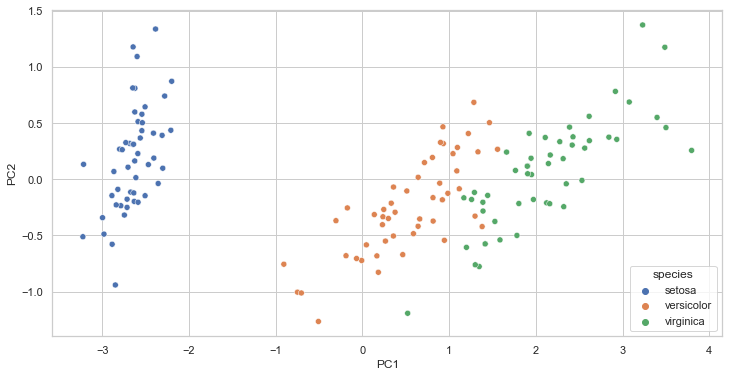

In [18]:
pca_iris = sns.scatterplot(iris_t["PC1"],iris_t["PC2"], hue=iris["species"]);

## Estandarizamos los datos

**Dado que KMeans se basa en la distancia** y nuestras variables tienen varianzas muy diferentes, aunque tengan la misma unidad, sería buena idea estandarizar los datos si no hubiéramos hecho PCA.
De todos modos, os dejo un ejemplo de cómo quedarían los datos.

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
dat_ = iris.copy()

In [23]:
dat_.drop(columns="species", inplace=True)

In [25]:
dat_.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [27]:
scaler = StandardScaler()
df_scaler = pd.DataFrame(scaler.fit_transform(dat_), columns=dat_.columns)
df_scaler.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


## Entrenamos el algoritmo

Como estamos probando y entendiendo el algoritmo, vamos a meter el número de clusters a mano

In [112]:
km = KMeans(n_clusters=3)
km.fit(iris_t)

KMeans(n_clusters=3)

In [113]:
y_pred = km.predict(iris_t)

In [114]:
iris_t["predict"] = y_pred

In [115]:
iris_t["real"] = iris["species"]

In [116]:
iris_t.head()

,PC1,PC2,predict,real
0,-2.684126,0.319397,1,setosa
1,-2.714142,-0.177001,1,setosa
2,-2.888991,-0.144949,1,setosa
3,-2.745343,-0.318299,1,setosa
4,-2.728717,0.326755,1,setosa


In [117]:
crosstab = pd.crosstab(iris_t.predict, iris_t.real)

In [118]:
crosstab

real,setosa,versicolor,virginica
predict,,,
0,0,3,36
1,50,0,0
2,0,47,14


### Sacamos K-means con todos los predictores

In [90]:
df_scaler.drop(columns=["real", "kmeans"], inplace=True)

In [91]:
km2  = KMeans(n_clusters=3)
km2.fit(df_scaler)

KMeans(n_clusters=3)

In [92]:
y_cuatro = km2.predict(df_scaler)

In [93]:
df_scaler["real"] = iris.species
df_scaler["kmeans"] = y_cuatro

In [94]:
df_scaler.head()

,sepal_length,sepal_width,petal_length,petal_width,real,kmeans
0,-0.900681,1.019004,-1.340227,-1.315444,setosa,0
1,-1.143017,-0.131979,-1.340227,-1.315444,setosa,0
2,-1.385353,0.328414,-1.397064,-1.315444,setosa,0
3,-1.506521,0.098217,-1.283389,-1.315444,setosa,0
4,-1.021849,1.249201,-1.340227,-1.315444,setosa,0


In [95]:
cross2 = pd.crosstab(df_scaler.kmeans, df_scaler.real)
cross2

real,setosa,versicolor,virginica
kmeans,,,
0,50,0,0
1,0,11,36
2,0,39,14


## Vamos a pintarlo

/usr/local/Caskroom/miniconda/base/envs/ironhack/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/Caskroom/miniconda/base/envs/ironhack/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


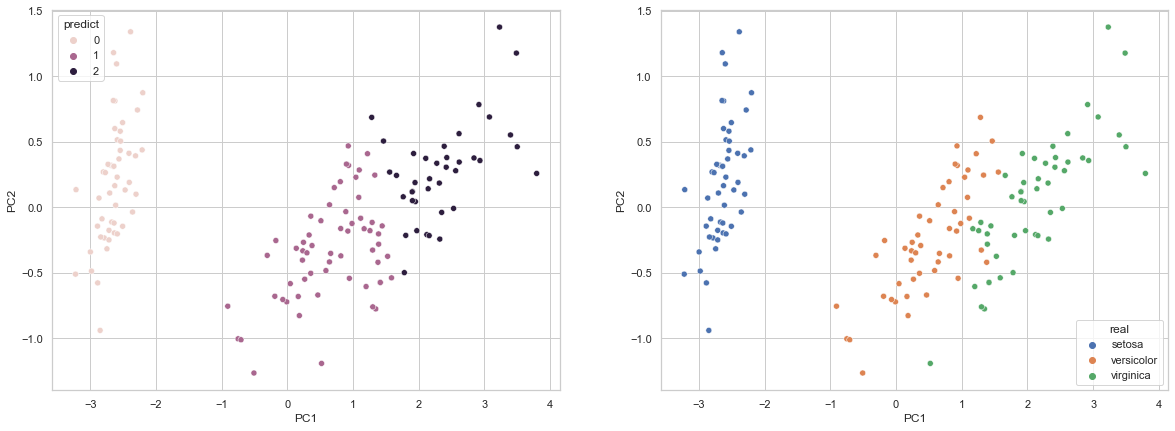

In [86]:
fig, axs = plt.subplots(1,2, figsize=(20,7))
pca_iris = sns.scatterplot(iris_t["PC1"],iris_t["PC2"], hue=iris_t["predict"], ax=axs[0]);
pca_iris = sns.scatterplot(iris_t["PC1"],iris_t["PC2"], hue=iris_t["real"], ax=axs[1]);

<AxesSubplot:xlabel='sepal_length', ylabel='Count'>

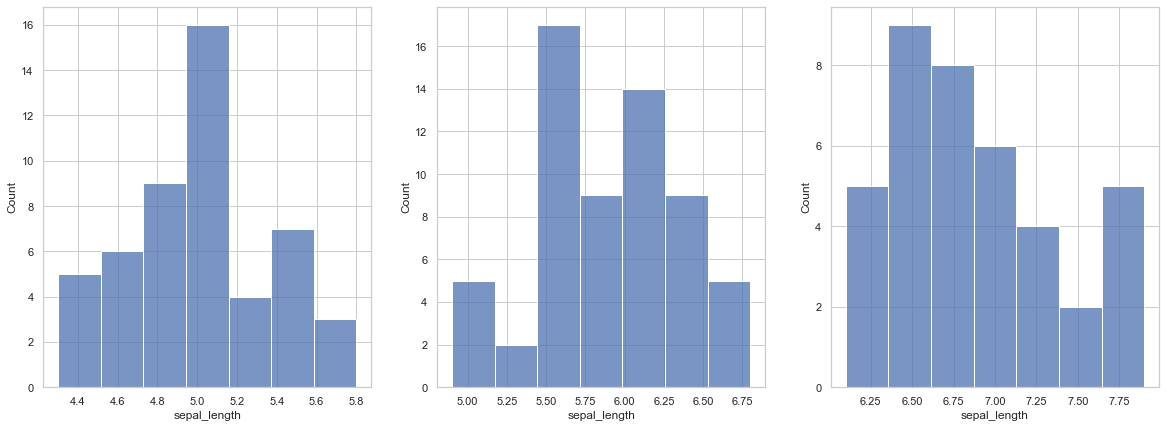

In [61]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20,7))
sns.histplot(x = iris.loc[eti0.index].sepal_length, ax=axs[0])
sns.histplot(x = iris.loc[eti1.index].sepal_length, ax=axs[1])
sns.histplot(x = iris.loc[eti2.index].sepal_length, ax=axs[2])

## Medimos el modelo / (Silhouette Score)
Puntuación de la silueta           
La puntuación de silueta es una métrica de la separación de los clusters.

Va de -1 a 1, donde los valores negativos significan que los clusters están mal asignados, 0 significa que los clusters se solapan y 1 significa que los clusters están separados y definidos.

In [62]:
from sklearn.metrics import silhouette_score

### Score del kmeans con los datos con PCA

In [65]:
iris_t_solopcs = iris_t.drop(columns=["predict", "real"])

In [66]:
silhouette_score(iris_t_solopcs, y_pred)

0.597676421954799

### Score del kmeans con los datos sin PCA

In [68]:
df_scaler_features = df_scaler.drop(columns=["real", "kmeans"])

In [70]:
silhouette_score(df_scaler_features, y_cuatro)

0.45937792074496625

## Método del codo
Probablemente el método más conocido, el método del codo, en el que se calcula y grafica la suma de cuadrado en cada número de clústeres, y allí buscas un cambio de pendiente de empinada a poca profundidad, un codo, para determinar el número óptimo de clústeres. Este método es inexacto, pero sigue siendo potencialmente útil.

El método de la curva del codo es útil porque muestra cómo el aumento del número de los clústeres contribuye a separar los clústeres de una manera significativa, no marginal. La curva indica que los grupos adicionales más allá del tercero tiene poco valor. El método del codo es bastante claro, sino una solución ingenua basada en la varianza intraclúster. La estadística de la brecha es un método más sofisticado para tratar con datos que tienen una distribución sin una agrupación obvia.

Este método funciona de la siguiente forma, se calcula la suma de errores cuadráticos dentro del clúster para diferentes valores de K y se elige la K para la cual la suma de errores cuadráticos comienza a disminuir. Esto es visible como un codo.

La suma dentro de un grupo de errores cuadrado suena un poco compleja. Vamos a desglosarlo:

El error cuadrado para cada punto es el cuadrado de la distancia del punto de su representación, es decir, su centro de clúster previsto.
La puntuación de la suma de errores cuadráticos es la suma de estos errores cuadrados para todos los puntos.
Se puede utilizar cualquier métrica de distancia, como la distancia Euclidiana o la distancia de Manhattan.
Ahora bien, para aplicar el método del codo y obtener el número óptimo de clústeres se puede realizar de la siguiente manera:

Calcular el algoritmo de agrupación para diferentes valores de K. Por ejemplo, variando K de 1 a 10 grupos.
Para cada K, calcular la suma total del cuadrado dentro del clúster.
Trazar la curva de la suma de errores cuadráticos de acuerdo con el número de grupos K.
La ubicación de una curva, codo, en la gráfica generalmente se considera como un indicador del número apropiado de grupos.

Método de error de inercia (Inertia error method): Cuanto más variedad haya entre las observaciones del dataset mayor serán sus distancias respecto a sus centroides asociados. La inercia o intertia, en el contexto del K-Means, es la suma de todas las distancias de las observaciones de un clúster a su centroide. Suponiendo que el objetivo es reducir la suma de distancias (cuadrados) de puntos con sus respectivos centroides, cuanto menor sea esta suma total, mejor, ya que indicará una mayor homogeneidad en las observaciones pertenecientes a los clústers creados.

In [73]:
kmeans = [KMeans(n_clusters=i) for i in range(1,21)]
for model in kmeans:
    model.fit(dat_)

In [74]:
inertias = [model.inertia_ for model in kmeans]
inertias[:3]

[681.3706, 152.34795176035792, 78.85144142614601]

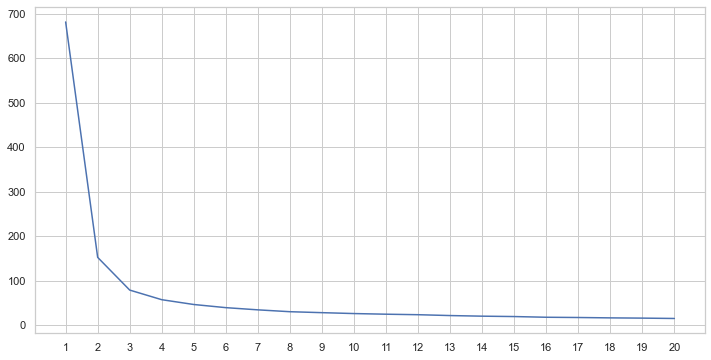

In [76]:
plt.plot(range(1,21),inertias)
plt.xticks(range(1,21));

Vemos que el punto exacto de cluster que debemos hacer para nuestros datos es 3